In [1]:
# imported libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

# local imports
import wrangle as w

# ignore warninga
import warnings
warnings.filterwarnings('ignore')

# Exploration Working Notebook

In [2]:
import wrangle as w

In [3]:
df = w.wrangle_data()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 540455 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoice_no   540455 non-null  object 
 1   stock_code   540455 non-null  object 
 2   description  540455 non-null  object 
 3   quantity     540455 non-null  int64  
 4   unit_price   540455 non-null  float64
 5   customer_id  540455 non-null  float64
 6   country      540455 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,540455.0,10.414251,155.223190,0.0,1.00,3.00,10.00,80995.0
unit_price,540455.0,4.664455,94.521856,0.0,1.25,2.08,4.13,38970.0
customer_id,540455.0,11507.851471,6760.792031,0.0,12367.00,14390.00,16261.00,18287.0


In [6]:
df.head(50)  

,invoice_no,stock_code,description,quantity,unit_price,customer_id,country
invoice_date,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom
2010-12-01 08:26:00,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.0,United Kingdom
2010-12-01 08:28:00,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom
2010-12-01 08:28:00,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom


## New features below based on features present:

In [7]:
df['total_price'] = df['quantity'] * df['unit_price']

In [8]:
df.head()

,invoice_no,stock_code,description,quantity,unit_price,customer_id,country,total_price
invoice_date,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


## Can we see patterns, find signals in the data?

## What features are driving the outcome?

## Are there other features we can construct that have stronger relationships?

## Visualization and statistical testing

## I want to walk away from exploration with with modeling strategies (feature selection, algorithm selection, evaluation methods, etc.).

## Lets take a look at the distributions of all features in the data

## What is the distribution of numerical features?

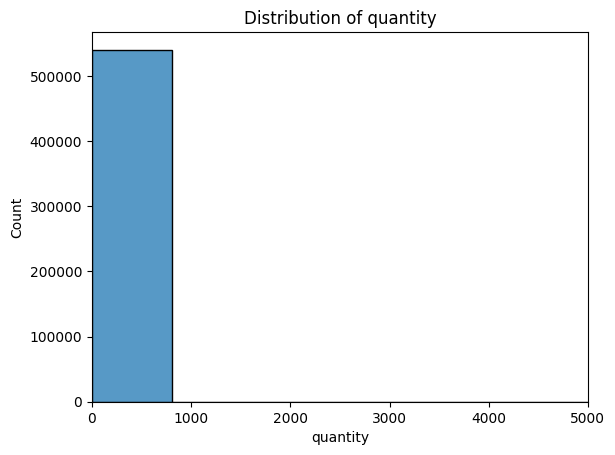

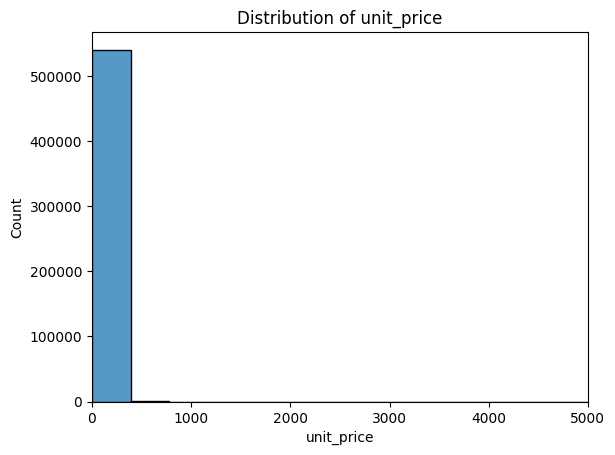

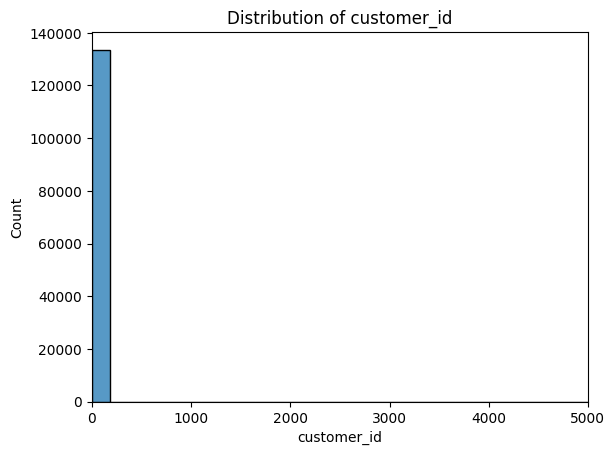

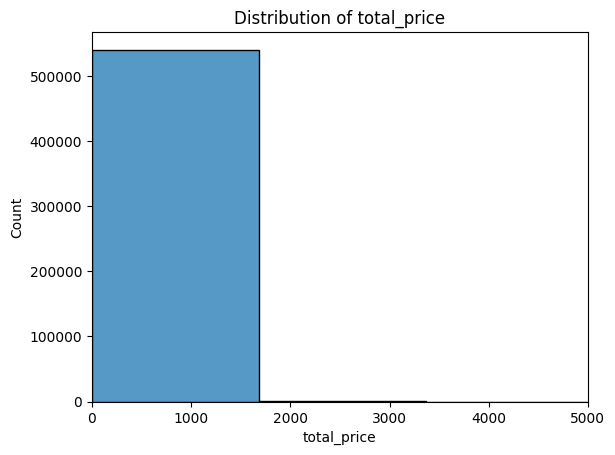

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]

# Created histograms for numeric columns
for col in numeric_cols:
    plt.figure()
    plt.title(f'Distribution of {col}')
    plt.xlim(0, 5000)
    sns.histplot(data=df, x=col, bins=100)
    plt.show()

## Categorical data

## What is the distribution of categorical features?

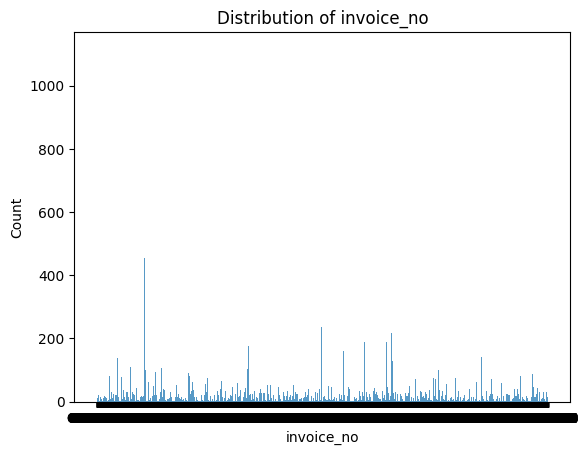

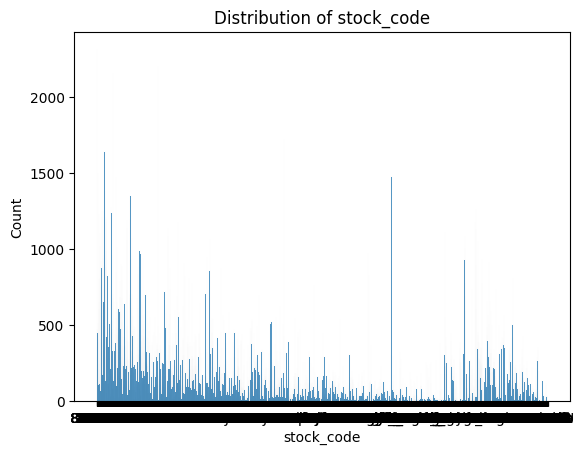

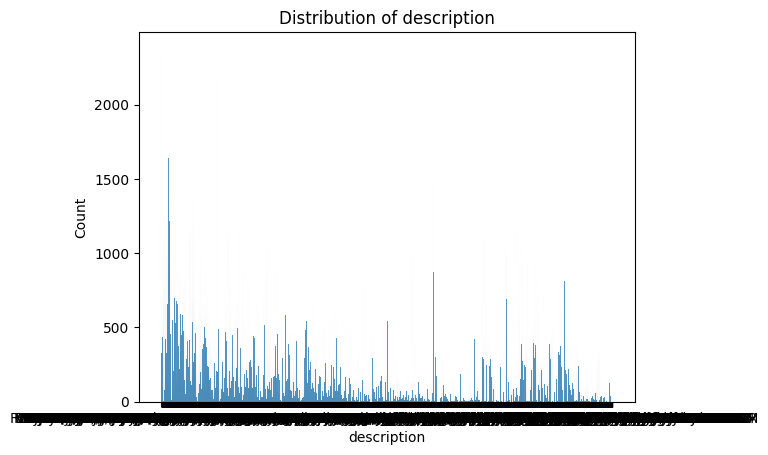

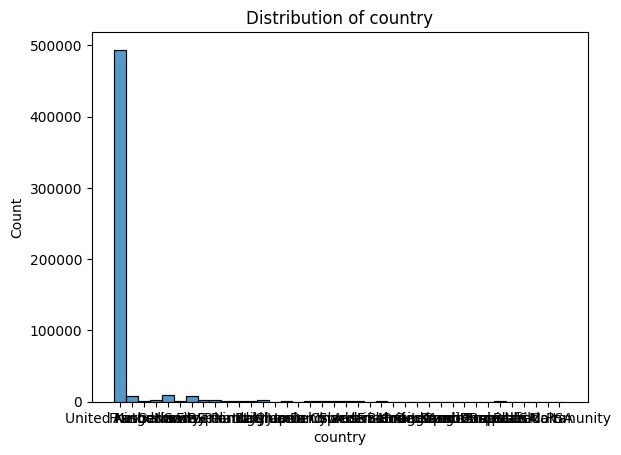

In [10]:
for col in df.columns[df.dtypes == 'object']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=df, x=col)
    plt.show()

# What does the correlation between all numerical features?

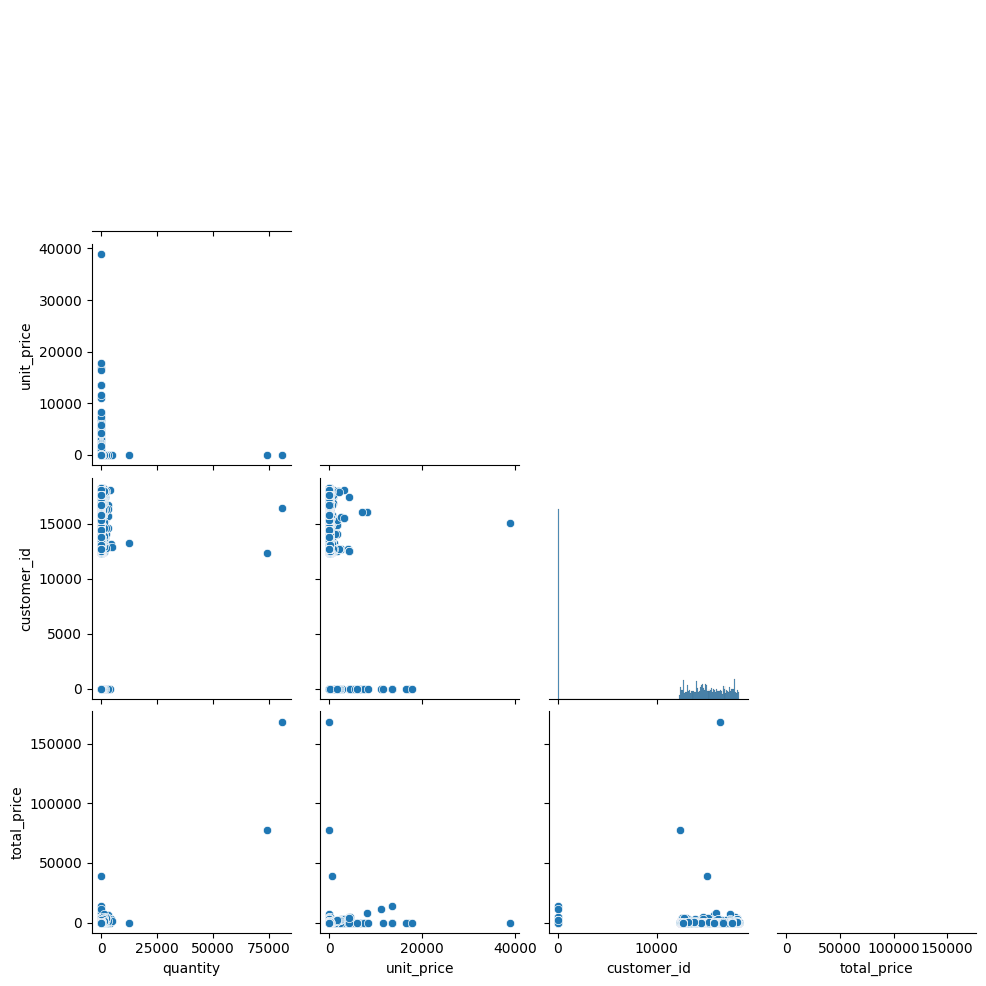

In [11]:
sns.pairplot(data = df, corner=True)

# what is the `country` count distributions within this data?

In [12]:
country_cnts = df.country.value_counts()
country_cnts = pd.DataFrame(country_cnts).reset_index()
country_cnts = country_cnts[country_cnts['count'] > 1000]

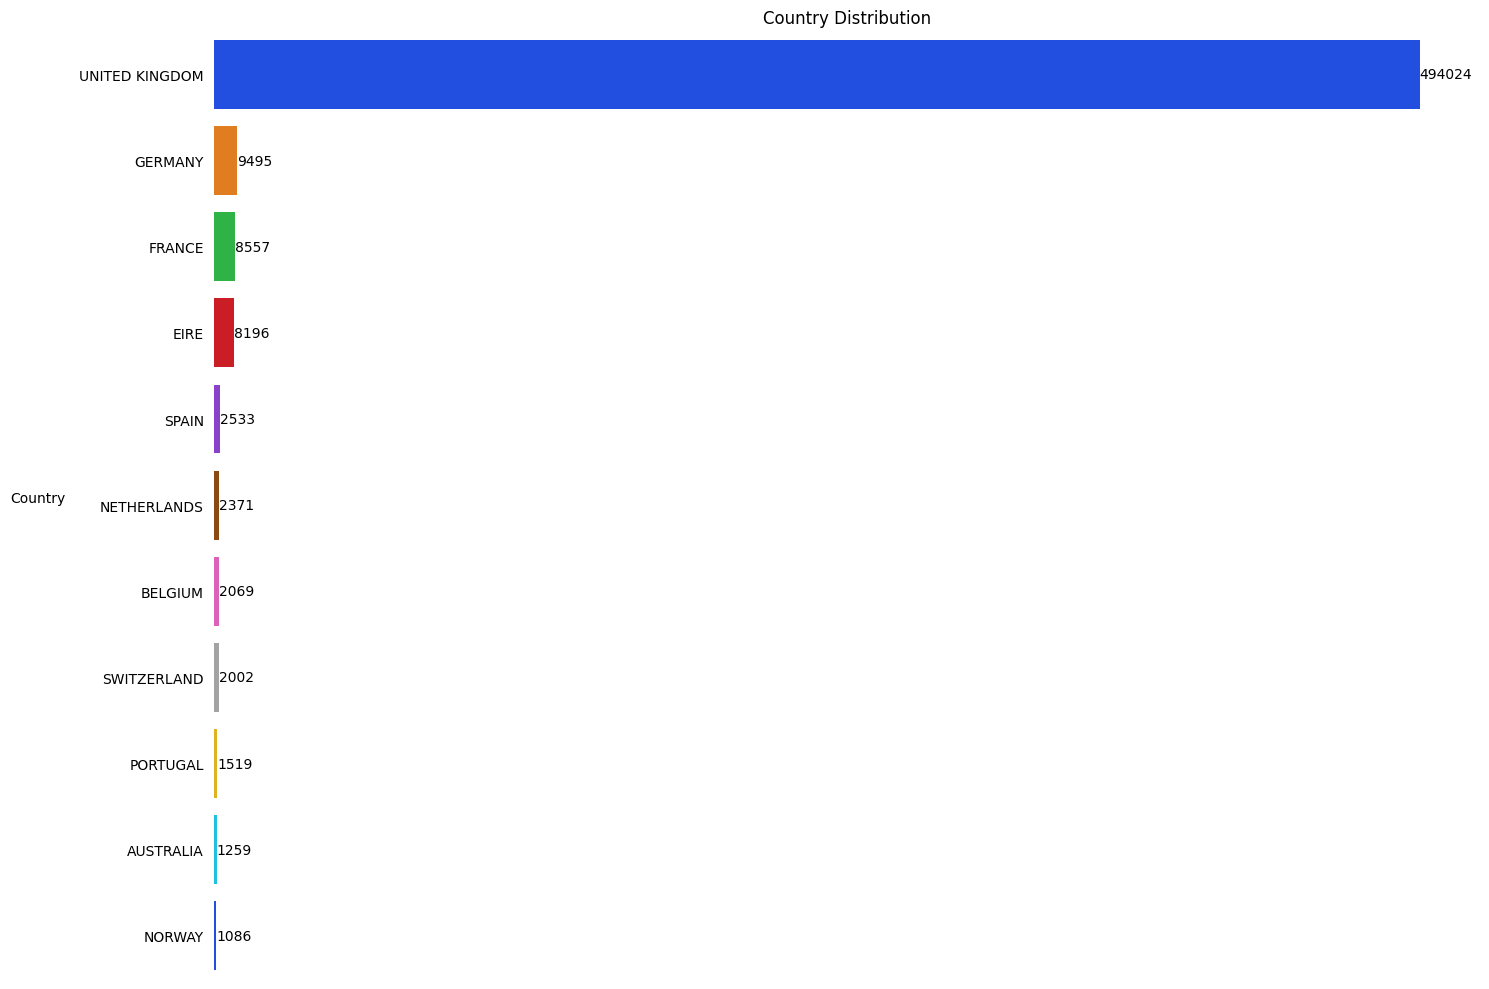

In [13]:
# set figsze
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(data=country_cnts, x='count', y='country', palette='bright')

# remove spines
sns.despine(left=True, bottom=True)

# adding values at the end of each bar
for p in ax.patches:
    
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

# Remove x-tick labels, keeping the ticks
ax.set_xticklabels([])
ax.set_xticks([])

# Remove y ticks
ax.tick_params(axis='y', which='both', left=False)
# ax.tick_params(axis='x', which='both', bottom=False, xlabel=None)

        
# set labels
plt.title('Country Distribution')

# capitalize the y-axis labels
ax.set_yticklabels([label.get_text().upper() for label in ax.get_yticklabels()])

plt.ylabel('Country', rotation=0, labelpad=30)
plt.xlabel('')
plt.tight_layout()
plt.show()

* The data is comprised of alot of infmormation relating to the United Kingdom

## How does `quantity` vary with `customer_id`?

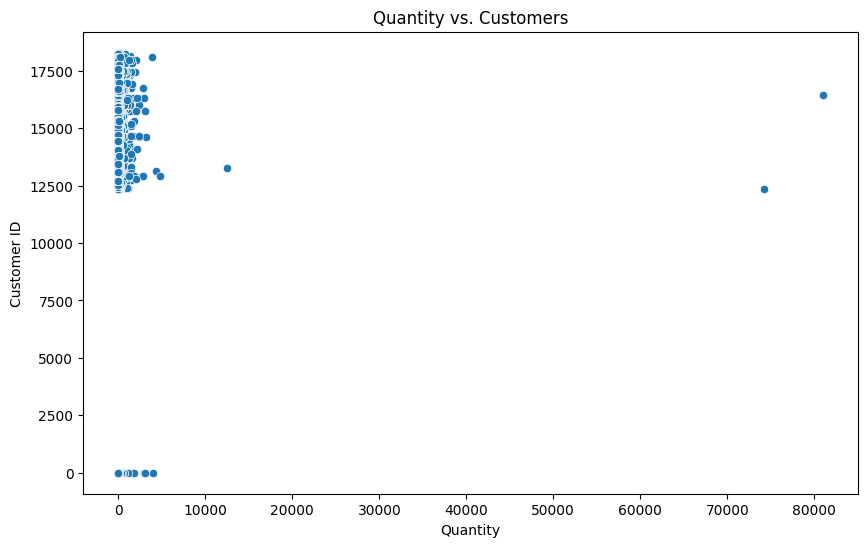

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity', y='customer_id', data=df)
plt.title('Quantity vs. Customers')
plt.xlabel('Quantity')
plt.ylabel('Customer ID')
plt.show()

## how about `unit_price` and `customer_id`?

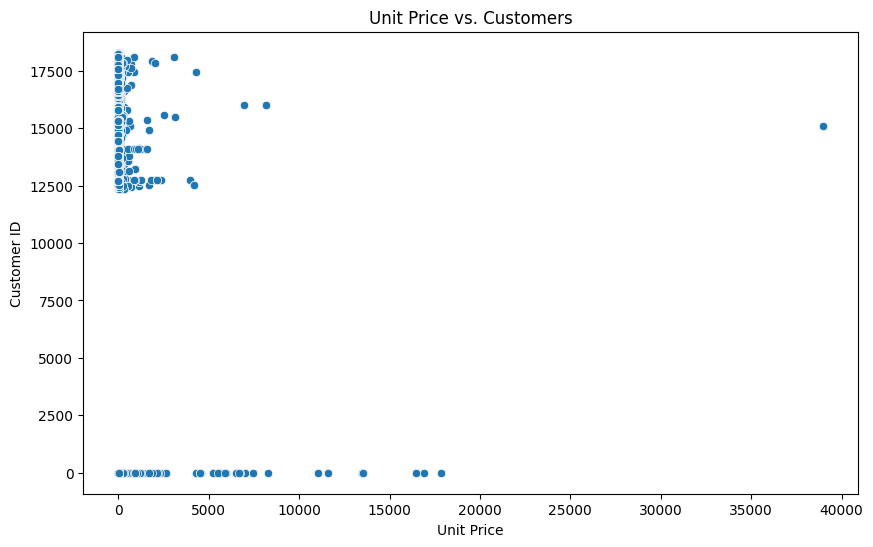

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unit_price', y='customer_id', data=df)
plt.title('Unit Price vs. Customers')
plt.xlabel('Unit Price')
plt.ylabel('Customer ID')
plt.show()

# How would scaling and normalizing features aid in getting a better visualization of distribution that exist within this dataset?

# Code added to prep function to handle negative values:

In [16]:
# df['quantity'] = df['quantity'].apply(lambda x: max(x, 0))
    
# df['unit_price'] = df['unit_price'].apply(lambda x: max(x, 0))

In [17]:
mms = MinMaxScaler()

df_scaled = mms.fit_transform(df[['quantity', 'unit_price']])


In [18]:
df.head()

,invoice_no,stock_code,description,quantity,unit_price,customer_id,country,total_price
invoice_date,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34
